# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing_df= pd.read_csv('data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Finding and Removing Null Values

In [3]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [4]:
housing_df.dropna(inplace = True)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [6]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [7]:
housing_df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

# Creating a new column with zipcodes

In [8]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States      38
Delridge Way Southwest, Seattle, Washington 98106, United States                  24
9th Ave, Nebraska City, Nebraska 68410, United States                             21
South 35th Avenue, Bellevue, Nebraska 68123, United States                        20
15th Avenue, Plattsmouth, Nebraska 68048, United States                           17
                                                                                  ..
1509 Lake Washington Boulevard South, Seattle, Washington 98144, United States     1
12112 202nd Avenue Northeast, Woodinville, Washington 98077, United States         1
4887 24th Avenue South, Seattle, Washington 98108, United States                   1
4510 86th Avenue Southeast, Mercer Island, Washington 98040, United States         1
309 Taylor Avenue Northwest, Renton, Washington 98057, United States               1
Name: address, Length: 29519, dtype: int64

In [9]:
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [10]:
housing_df = housing_df.drop(columns =['id', 'address', 'date', 'yr_renovated'], axis = 1 )

In [11]:
housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long,zipcode
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,...,Gas,PUBLIC,1180,0,0,40,1969,47.461975,-122.19052,98055
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,...,Oil,PUBLIC,1570,1570,0,240,1950,47.711525,-122.35591,98133
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,...,Gas,PUBLIC,1580,1580,0,0,1956,47.502045,-122.22520,98178
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,...,Gas,PUBLIC,1090,1070,200,270,2010,47.566110,-122.29020,98118
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,...,Electricity,PUBLIC,1120,550,550,30,2012,47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,...,Oil,PUBLIC,1600,1130,0,210,1921,47.664740,-122.32940,98103
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,...,Gas,PUBLIC,2020,0,0,520,2011,47.565610,-122.38851,98116
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,...,Gas,PUBLIC,940,920,240,110,1995,47.610395,-122.29585,98122
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,...,Gas,PUBLIC,1830,740,480,100,2006,47.449490,-122.18908,98055


# Creating a new column based on condition values

In [12]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [13]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [14]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

# Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [15]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [16]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [17]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

# Repeating steps above w/ view column

In [18]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

## Removing zip codes not in Kings County

In [19]:
zip_dict = dict({
98002 : "Auburn",
98092: "Auburn",
98224: "Baring",
98004: "Bellevue",
98005: "Bellevue",
98006: "Bellevue",
98007: "Bellevue",
98008: "Bellevue",
98010: "Black Diamond",
98011: "Bothell",
98178: "Bryn Mawr-Skyway",
98148: "Burien",
98166: "Burien",
98014: "Carnation",
98077: "Cottage Lake",
98042: "Covington",
98198: "Des Moines",
98019: "Duvall",
98031: "East Hill-Meridian",
98022: "Enumclaw",
98058: "Fairwood",
98024: "Fall City",
98003: "Federal Way",
98023: "Federal Way",
98027: "Issaquah",
98029: "Issaquah",
98028: "Kenmore",
98032: "Kent",
98030: "Kent",
98033: "Kirkland",
98034: "Kirkland",
98001: "Lakeland North",
98038: "Maple Valley",
98039: "Medina",
98040: "Mercer Island",
98045: "North Bend",
98047: "Pacific",
98050: "Preston",
98051: "Ravensdale",
98052: "Redmond",
98055: "Renton",
98056: "Renton",
98057: "Renton",
98059: "Renton",
98074: "Sammamish",
98075: "Sammamish",
98188: "SeaTac",
98199: "Seattle",
98174: "Seattle",
98154: "Seattle",
98158: "Seattle",
98164: "Seattle",
98101: "Seattle",
98102: "Seattle",
98103: "Seattle",
9810: "Seattle",
98105: "Seattle",
98106: "Seattle",
98107: "Seattle",
98108: "Seattle",
98109: "Seattle",
98112: "Seattle",
98115: "Seattle",
98116: "Seattle",
98117: "Seattle",
98118: "Seattle",
98119: "Seattle",
98121: "Seattle",
98122: "Seattle",
98125: "Seattle",
98126: "Seattle",
98133: "Seattle",
98134: "Seattle",
98136: "Seattle",
98144: "Seattle",
98155: "Shoreline",
98177: "Shoreline",
98288: "Skykomish",
98065: "Snoqualmie",
98168: "Tukwila",
98053: "Union Hill-Novelty Hill",
98195: "Univ Of Washington",
98070: "Vashon",
98146: "White Center",
98072: "Woodinville"})

In [20]:
zip_list = list(zip_dict.keys())

In [21]:
housing_df2 = housing_df[housing_df["zipcode"].isin(zip_list)]
housing_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_garage,sqft_patio,yr_built,lat,long,zipcode,condition_code,grade_str,grade_code,view_code
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,...,0,40,1969,47.461975,-122.19052,98055,3,Average,5,0
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,...,0,240,1950,47.711525,-122.35591,98133,2,Average,5,2
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,...,0,0,1956,47.502045,-122.22520,98178,2,Average,5,2
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,...,200,270,2010,47.566110,-122.29020,98118,2,Better,7,2
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,...,550,30,2012,47.532470,-122.07188,98027,2,Average,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,...,0,210,1921,47.664740,-122.32940,98103,3,Good,6,0
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,...,0,520,2011,47.565610,-122.38851,98116,2,Average,5,1
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,...,240,110,1995,47.610395,-122.29585,98122,2,Average,5,0
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,...,480,100,2006,47.449490,-122.18908,98055,2,Good,6,0


In [22]:
housing_df2 = housing_df2.drop(columns = ["condition","grade","grade_str","waterfront","view", "sqft_basement", "long","lat"], axis=1)

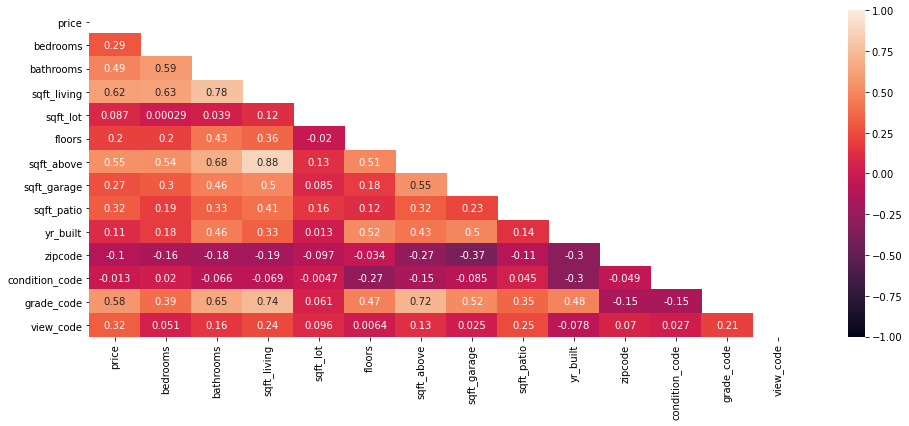

In [24]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True)